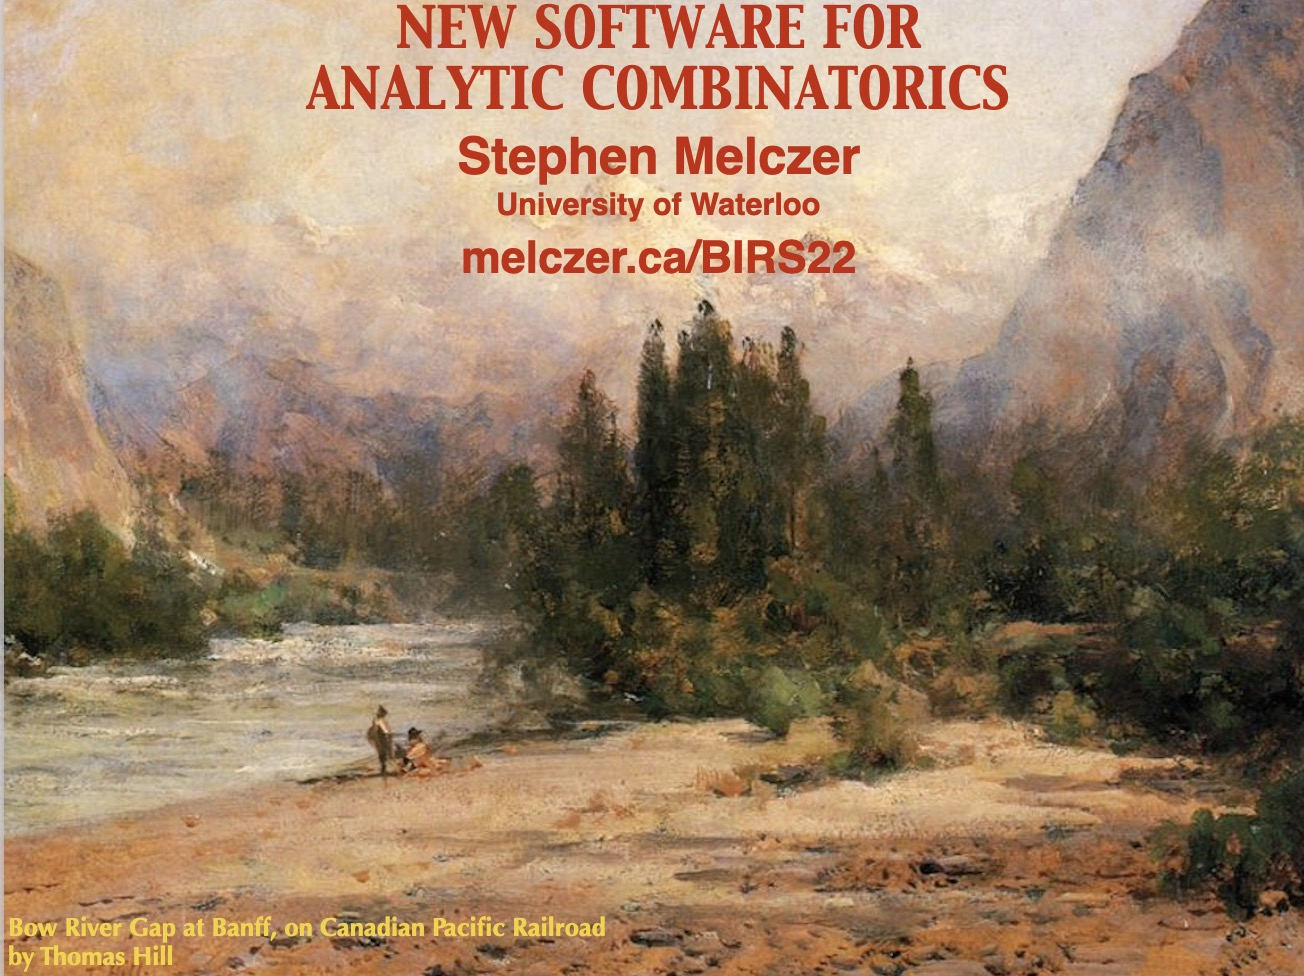

Let $(f_n) = f_0,f_1,\dots$ be a complex-valued sequence with generating function

$$ F(z) = \sum_{n \geq 0} f_nz^n $$


$f_n$ is **P-recursive** if it satisfies a non-trivial linear recurrence with poly coeffs

$$ 0 = c_r(n)f_{n+r} + \cdots + c_1(n)f_{n+1} + c_0(n)f_n$$


$F(z)$ is **D-finite** if it satisfies a non-trivial linear ODE with poly coeffs

$$ 0 = p_s(z)F^{(s)}(z) + \cdots + p_1(z)F'(z) + p_0(z)F(z)$$

**Question 1:** How do we find asymptotics of a P-recursive sequence?  
**Question 2:** When does a P-recursive sequence have *all* positive terms?  

**Motivation:** Canham model for biomembranes

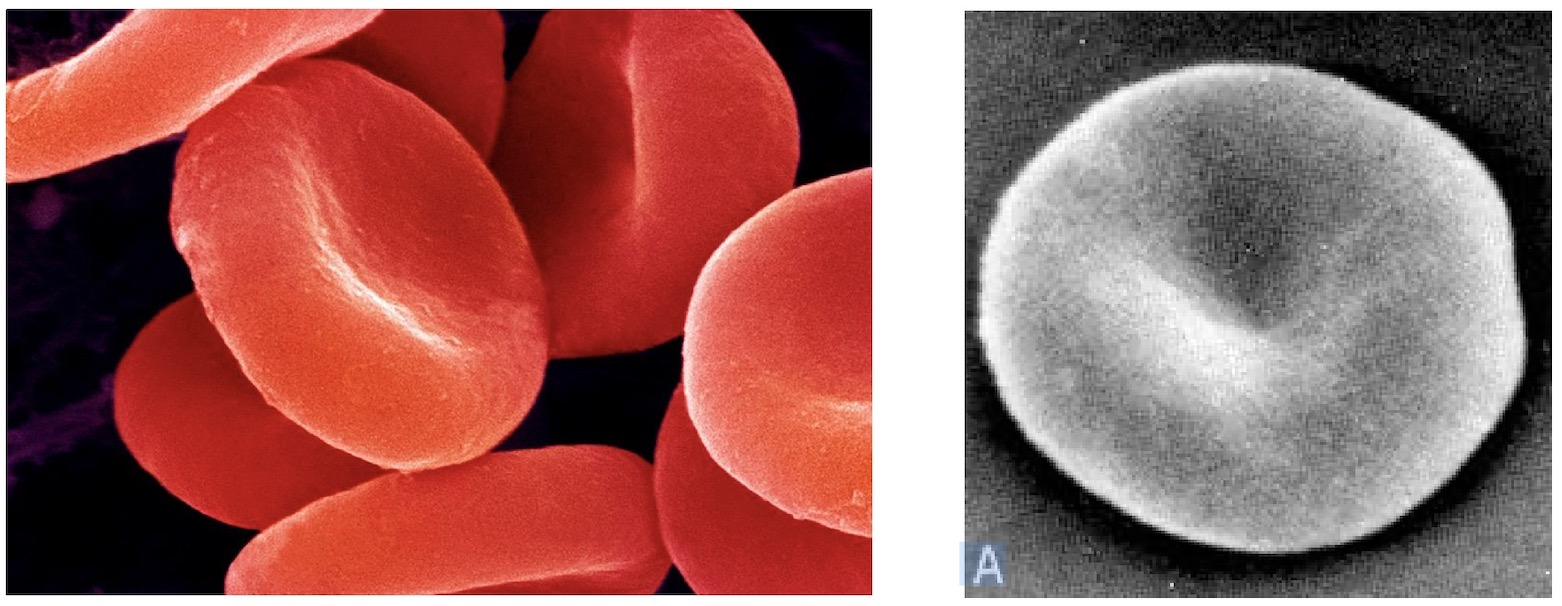

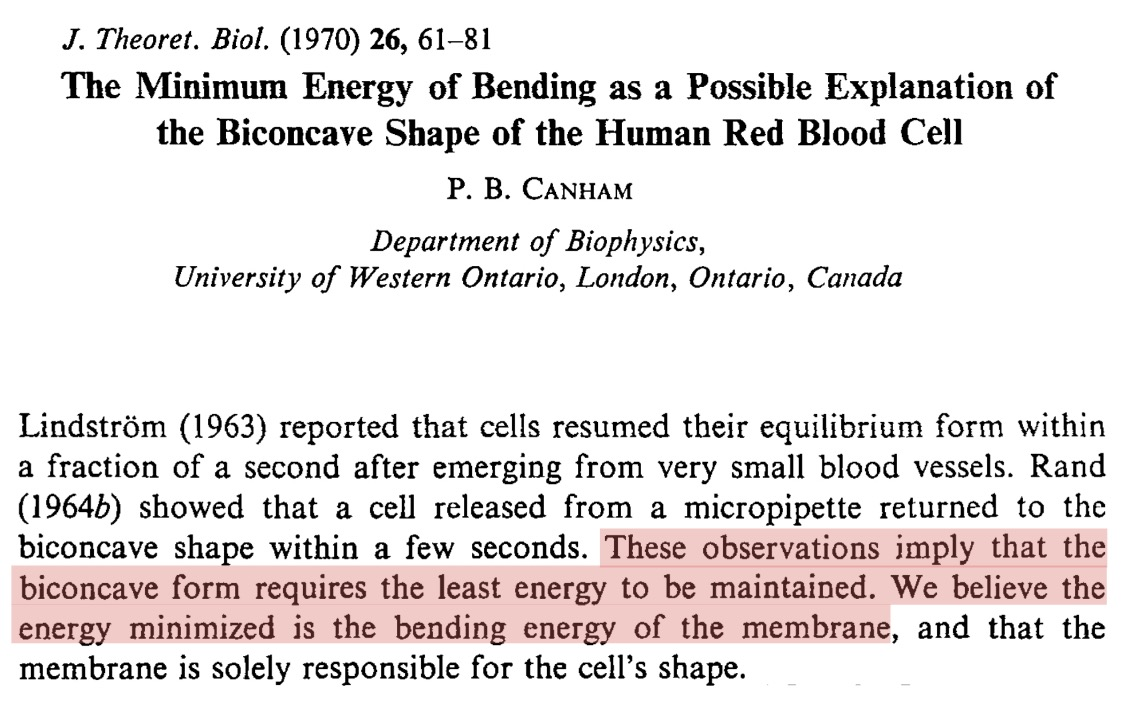

**Canham Problem:** For fixed genus $g$ and fixed *isoperimetric ratio* $\iota_0$ find the surface $S$ minimizing

$$E(S) = \int_S (\kappa_1 + \kappa_2)^2 dA$$

**Marques and Neves (2014):** Solution existence for genus one

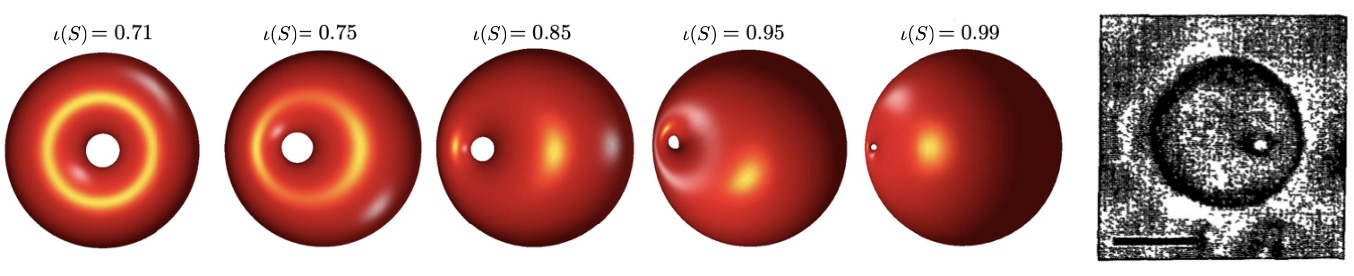

**Yu and Chen (2020):** The genus one model has a *unique* solution (for a range of isoperimetric ratios) if the sequence $(d_n)$ with initial terms 

$$(d_0,\dots,d_6) = \left(72, 1932, 31248, \frac{790101}{2}, \frac{17208645}{4}, \frac{338898609}{8},\frac{1551478257}{4}\right)$$ 

satisfying

$$ r_7(n)d_{n+7} + \cdots + r_0(n)d_{n} = 0$$

has **all positive terms** where the $r_j(n)$ are explicit polynomials.

**M. and Mezzarobba (2021):** This sequence has all positive terms.

**Dong, M. and Mezzarobba (2022):** Extend to general P-recursive sequences (and Sage implementation!).

### Shift Algebra

We can model a P-recursion using the *Shift algebra* consisting of polynomials in $S_n$ and $n$ such that $S_n n = (n+1)S_n$. 

Such polynomials act on sequences via 

$$n \cdot (f_n) = (nf_n) \qquad\qquad S_n \cdot (f_n) = (f_{n+1})$$

The Shift algebra is implemented in the Sage [ore_algebra](https://github.com/mkauers/ore_algebra/) package (Kauers, Jaroschek, Johansson, Mezzarobba, Verron, ...)

In [1]:
# Define the ring of shift operators
from ore_algebra import *
Ind.<n> = PolynomialRing(QQ); Shift.<Sn> = OreAlgebra(Ind)

In [2]:
# Algebraic Simplification
Sn * n

(n + 1)*Sn

The package can generate sequence terms efficiently

In [3]:
# Central binomial coefficients
rec = (n + 1)*Sn - 4*n - 2 
rec.to_list([1],10)

[1, 2, 6, 20, 70, 252, 924, 3432, 12870, 48620]

In [4]:
[binomial(2*k,k) for k in range(10)]

[1, 2, 6, 20, 70, 252, 924, 3432, 12870, 48620]

It can also *guess* P-recursions

In [5]:
LST = [binomial(2*k,k)^2 for k in range(10)]
LST

[1, 4, 36, 400, 4900, 63504, 853776, 11778624, 165636900, 2363904400]

In [6]:
guess(LST,Shift)

(-n^2 - 2*n - 1)*Sn + 16*n^2 + 16*n + 4

### Lattice Path Example
Let $s_n$ be the number of lattice paths on the steps $\{\text{North, South, East, West}\} = \{(\pm1,0),(0,\pm1)\}$ that start at the origin and stay in $\mathbb{N}^2$. 

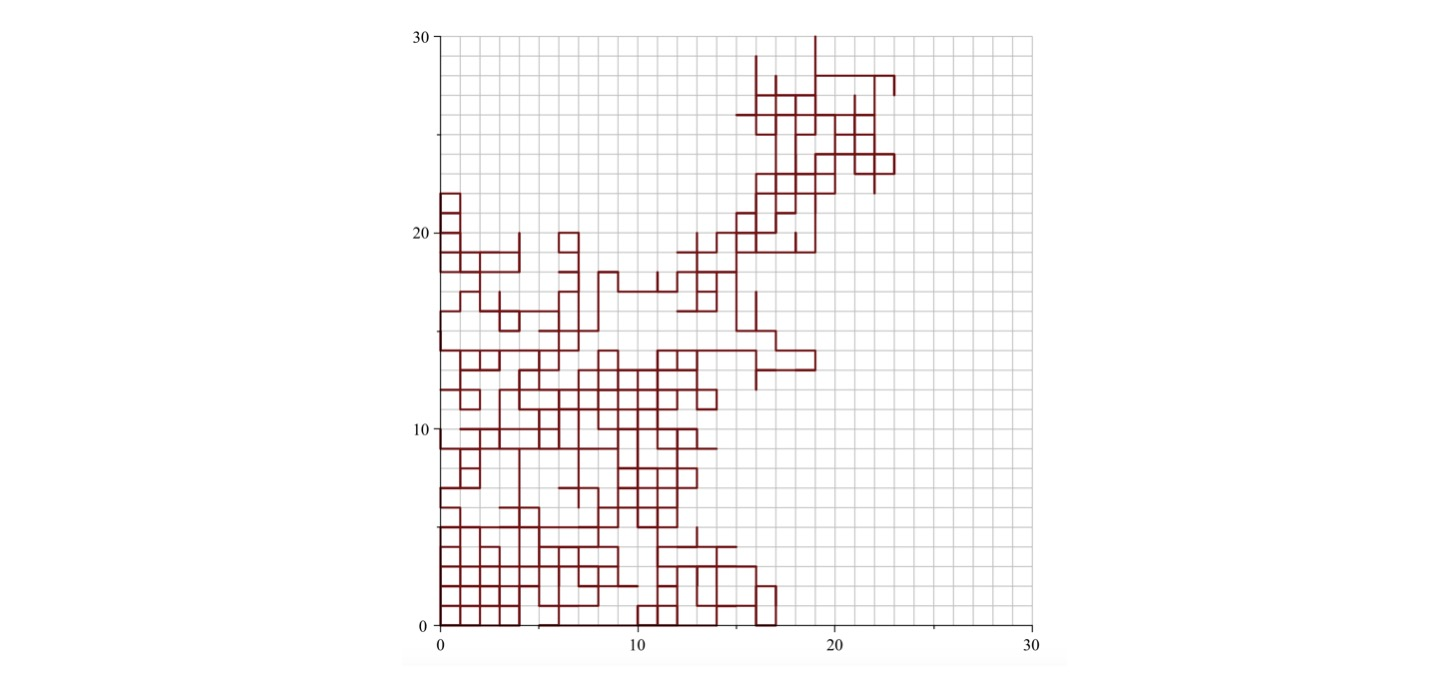

We can numerically compute terms in the counting sequence, then guess a P-recurrence it satisfies.

In [7]:
@CachedFunction 
def NSEW(i,j,n):
    if i<0 or j<0:               return 0
    elif n==0 and i==0 and j==0: return 1
    elif n==0:                   return 0
    else:                        return NSEW(i-1,j,n-1) + NSEW(i,j-1,n-1) + NSEW(i+1,j,n-1) + NSEW(i,j+1,n-1)
    
def s(n): return add([NSEW(i,j,n) for i in range(n+1) for j in range(n+1)])

print([s(n) for n in range(10)])

[1, 2, 6, 18, 60, 200, 700, 2450, 8820, 31752]


In [8]:
rec = guess([s(n) for n in range(50)], Shift)
rec

(-n^2 - 7*n - 12)*Sn^2 + (8*n + 20)*Sn + 16*n^2 + 48*n + 32

The solutions of a P-recurrence form a $\mathbb{C}$-vector space, and we can compute series expansions of an *asymptotic basis*.

In [9]:
rec = (-n^2 - 7*n - 12)*Sn^2 + (8*n + 20)*Sn + 16*n^2 + 48*n + 32
show(rec.generalized_series_solutions(n=3))

[4^n*n^(-1)*(1 - 3/2*n^(-1) + 19/8*n^(-2) + O(n^(-3))),
 (-4)^n*n^(-3)*(1 - 9/2*n^(-1) + 107/8*n^(-2) + O(n^(-3)))]

Thus, there exist $\color{red}\lambda_{\color{red}1},\color{red}\lambda_{\color{red}2} \in \mathbb{C}$ such that

$$ s_n = \color{red}\lambda_{\color{red}1} \frac{4^n}{n}\left(1 - \frac{3}{2n} + \cdots\right) + \color{red}\lambda_{\color{red}2} \frac{(-4)^n}{n^2}\left(1 - \frac{9}{2n} + \cdots\right) $$

*How do we find $\lambda_1,\lambda_2$?   
How do we **prove** $\lambda_1 \neq 0$?* 

Move to **differential equations** and use transfer theorems (Flajolet-Odlyzko, etc.).

### Differential Weyl Algebra

We can model a D-Finite equation using polynomials in $D_z$ and $z$ such that $D_z z = zD_z + 1$. 

In [10]:
# Define the ring of differential operators
Pols.<z> = PolynomialRing(QQ); Diff.<Dz> = OreAlgebra(Pols)
Dz * z

z*Dz + 1

In [11]:
# Can guess differential equations (or convert rec <-> ODE)
diff = guess([s(n) for n in range(50)],Diff)
diff

(16*z^4 - z^2)*Dz^3 + (128*z^3 + 8*z^2 - 6*z)*Dz^2 + (224*z^2 + 28*z - 6)*Dz + 64*z + 12

In [12]:
# We can compute a 'local' basis of solutions
diff.local_basis_expansions(0,5)

[z^(-2) - 4*z^(-1)*log(z) - 8*log(z) - 16*z*log(z) - 8*z - 48*z^2*log(z) - 28*z^2,
 z^(-1),
 1 + 2*z + 6*z^2]

In [13]:
# We can represent our GF in terms of a basis at the origin
ini = [0,0,1]

Techniques from numeric analysis, the study of ODEs, and computer algebra give **practical algorithms** for numeric analytic continuation (Chudnovskys, van der Hoeven, Mezzarobba, ...).

We obtain singular generating function expansions with rigorously approximated coefficients.

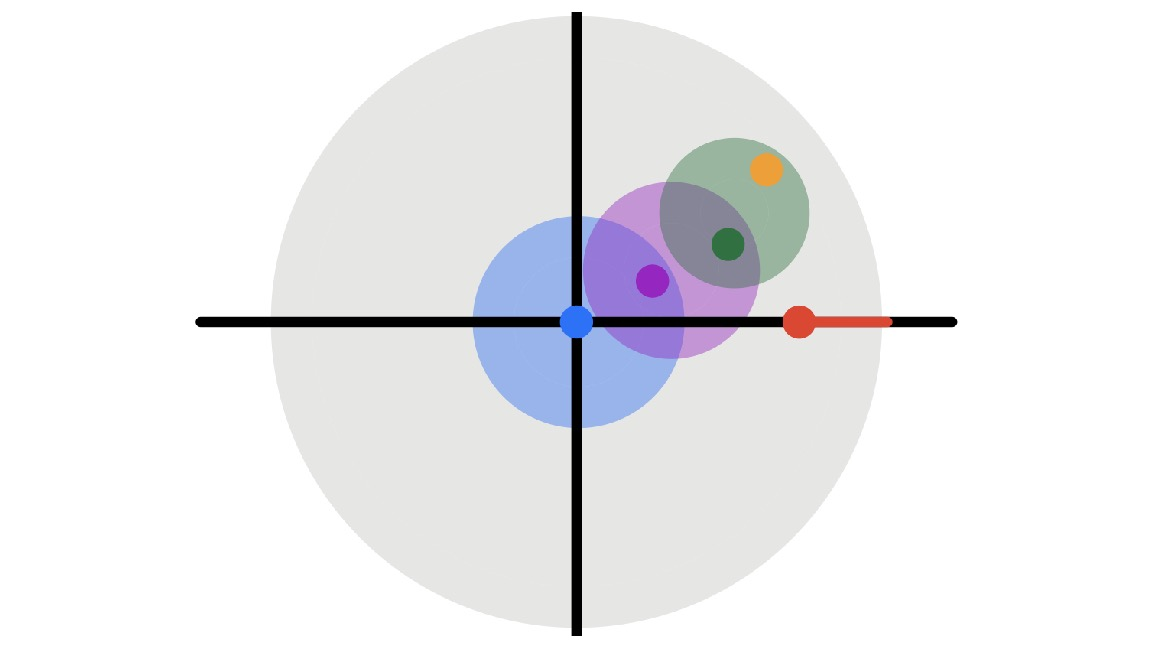

In [14]:
# Potential singularities for the GF are roots of the leading ODE coefficient
diff.leading_coefficient().factor()

(16) * (z - 1/4) * (z + 1/4) * z^2

In [15]:
# The generating function has a singular expansion at z=1/4 which begins
ini = [0,0,1]
bas = diff.numerical_transition_matrix([0,1/4],1e-2) * vector(ini)
loc = diff.local_basis_expansions(1/4,2)
add([a*b for [a,b] in zip(bas,loc)])

([-1.27+/-3.44e-3]+[+/-5.43e-15]*I)*log(z - 1/4) + ([7.6+/-0.0426]+[+/-3.26e-14]*I)*(z - 1/4)*log(z - 1/4) + ([-2.39+/-2.58e-3]+[4.00+/-3.91e-3]*I)*1 + ([12.9+/-0.0172]+[-24.0+/-0.0313]*I)*(z - 1/4)

In [16]:
# Using the coefficient extraction [z^n]log(1-4*z) = -4^n/n dominant asymptotic behaviour is
var('N')
show(-bas[0].real() * 4^N/N)

([1.27 +/- 3.44e-3])*4^N/N

What if we want **explicit** error bounds?

Flajolet-Odlyzko transfer theorems *in principle* give explicit upper bounds -- but they can be very painful to compute. 

We combine D-finite computer algebra tools with transfer theorems to make everything automatic.

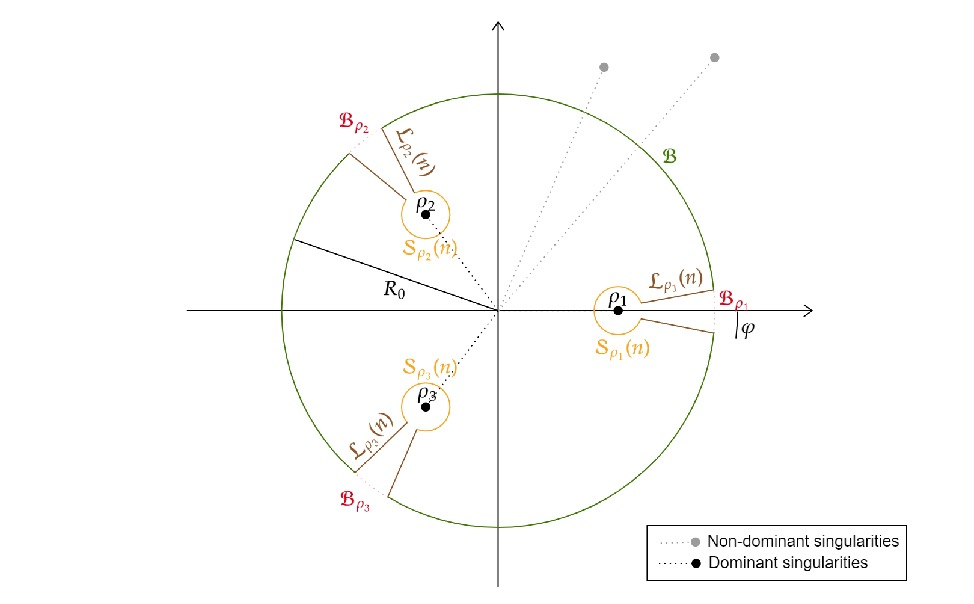

In [17]:
# Reimport needed functions
from ore_algebra import *
from ore_algebra import (OreAlgebra, DFiniteFunctionRing, UnivariateDFiniteFunction)
from ore_algebra.analytic.singularity_analysis import (bound_coefficients, check_seq_bound, eval_bound)
Pols.<z> = PolynomialRing(QQ); Diff.<Dz> = OreAlgebra(Pols);

### Lattice Path Example

In [18]:
# Enter the differential operator and initial conditions
dop = (z^2*(4*z - 1)*(4*z + 1)*Dz^3 + 2*z*(4*z+1)*(16*z-3)*Dz^2 + 2*(112*z^2 + 14*z - 3)*Dz + 4*(16*z + 3))
bound_coefficients(dop, [1, 2, 6], order=2, prec=20)

1.00000*4^n*(([1.2732 +/- 4.39e-5] + [+/- 5.44e-15]*I)*n^(-1) + ([-1.9099 +/- 5.60e-5] + [+/- 8.16e-15]*I)*n^(-2) + B([1503.38 +/- 3.05e-3]*n^(-3)*log(n), n >= 7))

Thus, the number $s_n$ of quadrant walks satisfies

$$
\begin{aligned}
s_n \in \frac{4^{n}}{n} \cdot \biggl( &
    \left[1.27 \pm 4.39 \cdot 10^{-5}\right]
    + \left[-1.91 \pm 5.60 \cdot 10^{-5}\right] \frac{1}{n} 
    + \left[1503.38\pm 3.05 \cdot 10^{-3}\right] \frac{\log^2 n}{n^2} \biggr)
\end{aligned}
$$

when $n \geq 7$.

### Genus One Biomembrane Example

In [19]:
seqini = [72, 1932, 31248, 790101/2, 17208645/4, 338898609/8, 1551478257/4]
deq = (8388593*z^2*(3*z^4 - 164*z^3 + 370*z^2 - 164*z + 3)*(z + 1)^2*(z^2 - 6*z + 1)^2*(z - 1)^3*Dz^3 + 8388593*z*(z + 1)*(z^2 - 6*z + 1)*(66*z^8 - 3943*z^7 + 18981*z^6 - 16759*z^5 - 30383*z^4 + 47123*z^3 - 17577*z^2 + 971*z - 15)*(z - 1)^2*Dz^2 + 16777186*(z - 1)*(210*z^12 - 13761*z^11 + 101088*z^10 - 178437*z^9 - 248334*z^8 + 930590*z^7 - 446064*z^6 - 694834*z^5 + 794998*z^4 - 267421*z^3 + 24144*z^2 - 649*z + 6)*Dz + 6341776308*z^12 - 427012938072*z^11 + 2435594423178*z^10 - 2400915979716*z^9 - 10724094731502*z^8 + 26272536406048*z^7 - 8496738740956*z^6 - 30570113263064*z^5 + 39394376229112*z^4 - 19173572139496*z^3 + 3825886272626*z^2 - 170758199108*z + 2701126946)
deq

(25165779*z^15 - 1702884379*z^14 + 22196217078*z^13 - 108363844374*z^12 + 197744302789*z^11 - 20375892397*z^10 - 350408306796*z^9 + 350408306796*z^8 + 20375892397*z^7 - 197744302789*z^6 + 108363844374*z^5 - 22196217078*z^4 + 1702884379*z^3 - 25165779*z^2)*Dz^3 + (553647138*z^14 - 36951752165*z^13 + 394079321954*z^12 - 1450287066584*z^11 + 1482230828728*z^10 + 2523313940179*z^9 - 6434889690300*z^8 + 3026134593192*z^7 + 3073463034898*z^6 - 3856865346575*z^5 + 1475536731514*z^4 - 205218539152*z^3 + 9026126068*z^2 - 125828895*z)*Dz^2 + (3523209060*z^13 - 234394065606*z^12 + 1926843034914*z^11 - 4689642916650*z^10 - 1172674969842*z^9 + 19779027227864*z^8 - 23096380215644*z^7 - 4173660561220*z^6 + 24995188572752*z^5 - 17824401172934*z^4 + 4891640236090*z^3 - 415956772498*z^2 + 10989056830*z - 100663116)*Dz + 6341776308*z^12 - 427012938072*z^11 + 2435594423178*z^10 - 2400915979716*z^9 - 10724094731502*z^8 + 26272536406048*z^7 - 8496738740956*z^6 - 30570113263064*z^5 + 39394376229112*z^4 - 191

In [20]:
bound_coefficients(deq, seqini, order=5, prec=20, n0=50)

1.00000*5.828427124746190?^n*(([8.072 +/- 2.14e-4] + [+/- 1.46e-17]*I)*n^3*log(n) + ([1.371 +/- 6.13e-4] + [+/- 1.08e-4]*I)*n^3 + ([50.51 +/- 1.93e-3] + [+/- 9.09e-17]*I)*n^2*log(n) + ([29.70 +/- 3.31e-3] + [+/- 6.71e-4]*I)*n^2 + ([106.36 +/- 2.17e-3] + [+/- 1.92e-16]*I)*n*log(n) + ([118.76 +/- 6.82e-3] + [+/- 1.42e-3]*I)*n + ([72.85 +/- 5.30e-3] + [+/- 1.32e-16]*I)*log(n) + [154.7 +/- 0.0142] + [+/- 9.55e-4]*I + ([-0.28378 +/- 3.33e-6] + [+/- 5.11e-19]*I)*n^(-1)*log(n) + ([35.5 +/- 0.0224] + [+/- 3.41e-6]*I)*n^(-1) + B([3056.72 +/- 2.66e-3]*n^(-2)*log(n)^2, n >= 50))

**Corollary:** The sequence has all positive terms. (Check finite number by hand then use explicit bound)

### Difficulty for Positivity: Cancellation

If there are multiple dominant singularities, it can be hard to decide if cancellation occurs (open problem even for univariate functions!). This is not a worry for $\mathbb{N}$-rational functions (basically all the ones we care about in actual enumeration problems).

### Difficulty for Asymptotics: Certifying Singularities

In [21]:
# Consider the sequence satisfying the P-recurrence
ini = [1,1/4]
rec = (n+3)^2*Sn^2 - (n+2)*(3*n+11)/2*Sn + (n+4)*(n+1)/2
rec

(n^2 + 6*n + 9)*Sn^2 + (-3/2*n^2 - 17/2*n - 11)*Sn + 1/2*n^2 + 5/2*n + 2

In [22]:
# The GF satisfies the D-finite equation
diff = rec.to_D(Diff)
diff

(1/2*z^4 - 3/2*z^3 + z^2)*Dz^4 + (7*z^3 - 16*z^2 + 7*z)*Dz^3 + (26*z^2 - 41*z + 9)*Dz^2 + (26*z - 22)*Dz + 4

In [23]:
# There is an apparent singularity at z=1
diff.leading_coefficient().factor()

(1/2) * (z - 2) * (z - 1) * z^2

It is not an actual singularity but the algorithm cannot detect this (the famous "connection problem")

In [24]:
bound_coefficients(diff, ini, prec=1000)

1.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000*([+/- 1.01e-305] + [+/- 2.15e-333]*I + B(2975.638373324056374258361756801605224609375000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000*(4/7)^n, n >= 11))

If the GF is known analytic at a point, this can be passed to the algorithm

In [25]:
bound_coefficients(diff, ini, prec=20, known_analytic=[0,1])

1.00000*(1/2)^n*(([1.0000 +/- 8.44e-6] + [+/- 5.71e-14]*I)*n^(-1) + ([-1.0000 +/- 8.44e-6] + [+/- 5.71e-14]*I)*n^(-2) + ([1.000 +/- 1.96e-5] + [+/- 1.72e-13]*I)*n^(-3) + B([4123.48 +/- 3.44e-3]*n^(-4)*log(n), n >= 9))

This issue arises in lattice path enumeration.

For instance, walks on the steps $\{\text{North}, \text{South East}, \text{South West}\}$  restricted to the quadrant satisfy the following D-finite equation.

In [26]:
# D-finite equation and initial coeffs of GF
ini = [1,1,2,3,8,15,39]
deq = (196608*z^16 - 4096*z^15 - 106496*z^14 + 90112*z^13 + 4096*z^12 + 16192*z^11 + 3776*z^10 - 4736*z^9 - 560*z^8 - 124*z^7 - 33*z^6 + 52*z^5 + 7*z^4 - 2*z^3)*Dz^4 + (3145728*z^15 - 462848*z^14 - 1073152*z^13 + 1252352*z^12 + 192512*z^11 + 370112*z^10 + 76800*z^9 - 58176*z^8 - 11152*z^7 - 2468*z^6 - 968*z^5 + 518*z^4 + 90*z^3 - 22*z^2)*Dz^3 + (14155776*z^14 - 3870720*z^13 - 2199552*z^12 + 4733952*z^11 + 1582080*z^10 + 2059392*z^9 + 525696*z^8 - 164256*z^7 - 47904*z^6 - 9648*z^5 - 5508*z^4 + 1236*z^3 + 306*z^2 - 60*z)*Dz^2 + (18874368*z^13 - 7544832*z^12 + 294912*z^11 + 5081088*z^10 + 3201024*z^9 + 3148416*z^8 + 1068864*z^7 - 68832*z^6 - 41136*z^5 - 5520*z^4 - 7584*z^3 + 648*z^2 + 276*z - 36)*Dz + 4718592*z^12 - 2482176*z^11 + 811008*z^10 + 964608*z^9 + 1075200*z^8 + 880128*z^7 + 387648*z^6 + 31296*z^5 + 6864*z^4 + 3024*z^3 - 1320*z^2 + 72*z + 36
deq

(196608*z^16 - 4096*z^15 - 106496*z^14 + 90112*z^13 + 4096*z^12 + 16192*z^11 + 3776*z^10 - 4736*z^9 - 560*z^8 - 124*z^7 - 33*z^6 + 52*z^5 + 7*z^4 - 2*z^3)*Dz^4 + (3145728*z^15 - 462848*z^14 - 1073152*z^13 + 1252352*z^12 + 192512*z^11 + 370112*z^10 + 76800*z^9 - 58176*z^8 - 11152*z^7 - 2468*z^6 - 968*z^5 + 518*z^4 + 90*z^3 - 22*z^2)*Dz^3 + (14155776*z^14 - 3870720*z^13 - 2199552*z^12 + 4733952*z^11 + 1582080*z^10 + 2059392*z^9 + 525696*z^8 - 164256*z^7 - 47904*z^6 - 9648*z^5 - 5508*z^4 + 1236*z^3 + 306*z^2 - 60*z)*Dz^2 + (18874368*z^13 - 7544832*z^12 + 294912*z^11 + 5081088*z^10 + 3201024*z^9 + 3148416*z^8 + 1068864*z^7 - 68832*z^6 - 41136*z^5 - 5520*z^4 - 7584*z^3 + 648*z^2 + 276*z - 36)*Dz + 4718592*z^12 - 2482176*z^11 + 811008*z^10 + 964608*z^9 + 1075200*z^8 + 880128*z^7 + 387648*z^6 + 31296*z^5 + 6864*z^4 + 3024*z^3 - 1320*z^2 + 72*z + 36

In [27]:
# There is an apparent singularity at z=1/3 that is not an actual singularity
bound_coefficients(deq, ini, prec=20)

1.00000*3^n*(([+/- 1.41e-12] + [+/- 6.16e-14]*I)*n^(-1/2) + ([+/- 2.90e-12] + [+/- 1.27e-13]*I)*n^(-3/2) + ([+/- 7.87e-12] + [+/- 3.45e-13]*I)*n^(-5/2) + B([3.67702e+22 +/- 3.85e+16]*n^(-7/2), n >= 10))

**Solution:** A new representation for the sequence!

# Analytic Combinatorics in Several Variables (ACSV)

Consider now a $d$-variate series

$$ F(\mathbf{z}) = \sum_{\mathbf{i}\in\mathbb{N}^d} f_{\mathbf{i}}z_1^{i_1}\cdots z_d^{i_d} = \sum_{\mathbf{i}\in\mathbb{N}^d} f_{\mathbf{i}}\mathbf{z}^{\mathbf{i}}$$

The **r-diagonal sequence** consists of the coefficients $(f_{n\mathbf{r}}) = f_{\mathbf{0}}, f_\mathbf{r}, f_{2\mathbf{r}},\dots$  

Note $f_{n\mathbf{r}}$ is defined only if $n\mathbf{r} \in \mathbb{N}^d$.

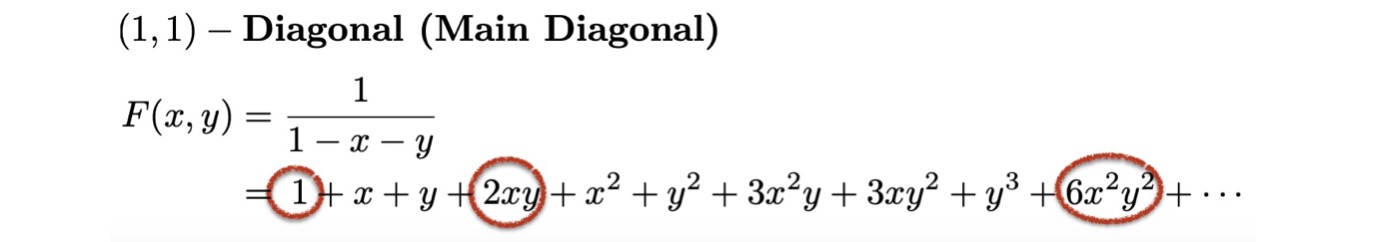

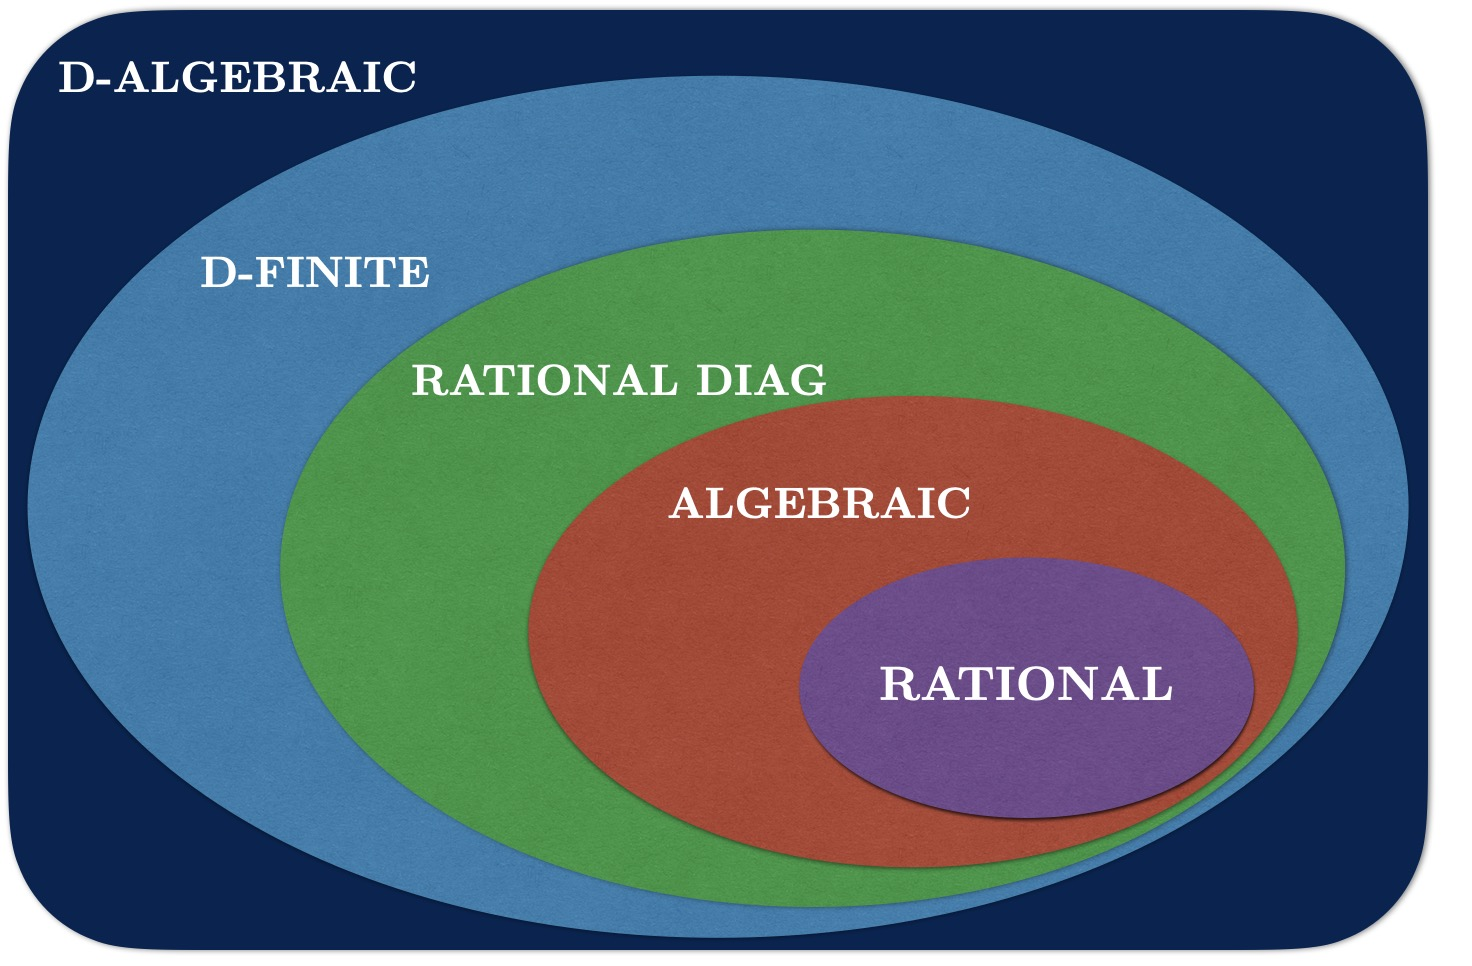

Assume that the rational function 

$$F(\mathbf{z}) = \frac{G(\mathbf{z})}{H(\mathbf{z})} = \sum_{\mathbf{i}\in\mathbb{N}^d} f_\mathbf{i} \mathbf{z}^\mathbf{i} $$

converges in a neighbourhood of the origin.

The singularities of $F(\mathbf{z})$ are given by $\mathcal{V} = \{\mathbf{z}:H(\mathbf{z})=0\}$.  
Singularities closest to the origin are called **minimal points**.

The Cauchy integral formula has a higher-dim generalization

$$ f_{n\mathbf{r}} = \frac{1}{(2\pi i)^d} \int_\mathcal{C} F(\mathbf{z}) \frac{d\mathbf{z}}{\mathbf{z}^{n\mathbf{r}+\mathbf{1}}}.$$

**Simplest case:** Denominator $H$ and partial derivatives don't simultaneously vanish (*smooth simple poles*).

In this case, the **critical points** of $F$ in the direction $\mathbf{r}$ are defined by

$$ H(\mathbf{z}) = \frac{z_1}{r_1} H_{z_1}(\mathbf{z}) = \cdots = \frac{z_d}{r_d} H_{z_d}(\mathbf{z}) = 0 $$

**Critical points:** Locally the singular set has a saddle-point  
**Minimal points:** Cauchy integral can be easily deformed close to

**Generically:** A finite set of minimal critical points.

### Main Theorem of Smooth ACSV

Suppose that the critical point system admits a finite number of solutions.

If there is exactly one minimal solution $\mathbf{w} \in \mathbb{C}_*^d$ and $H_{z_d}(\mathbf{w})$ and a certain determinant is non-zero then

$$[\mathbf{z}^{n\mathbf{r}}]\frac{G(\mathbf{z})}{H(\mathbf{z})} = \mathbf{w}^{-n\mathbf{r}} n^{(1-d)/2} \left(C_\mathbf{w} + O\left(\frac{1}{n}\right)\right)$$

If there are a finite number of minimal critical points with the same coordinate-wise moduli satisfying these conditions, then just add the contributions.

Can show uniform error as $\mathbf{r}$ varies over *generic* directions, which also gives central limit theorems. 

Consider the function

$$F(x,y) = \frac{1}{1-x-y} = \sum_{i,j \geq 0}\binom{i+j}{i}x^jy^j.$$

**Critical point equations in direction $\mathbf{r} = (1,1)$**

$$ 1-x-y = 0 \qquad -x=-y $$

**Unique minimal critical point**

$$(x,y)=\left(\frac{1}{2},\frac{1}{2}\right)$$

**Asymptotics** 
$$ \binom{2n}{n} = [x^ny^n]F(x,y) = \frac{4^n}{\sqrt{\pi n}}\left(1+O\left(n^{-1}\right)\right)$$

Consider the function

$$F(x,y) = \frac{1}{1-x-y} = \sum_{i,j \geq 0}\binom{i+j}{i}x^jy^j.$$

**Critical point equations in direction $\mathbf{r} = (r,s)$**

$$ 1-x-y = 0 \qquad -sx=-ry $$

**Unique minimal critical point**

$$(x,y)=\left(\frac{r}{r+s},\frac{s}{r+s}\right)$$

**Asymptotics** 
$$ \binom{rn+sn}{rn} = [x^{rn}y^{sn}]F(x,y) = \left(\frac{r+s}{r}\right)^{rn}\left(\frac{r+s}{s}\right)^{sn}\frac{\sqrt{r+s}}{\sqrt{2rs\pi n}}\left(1+O\left(n^{-1}\right)\right)$$

The hardest part of asymptotics under these conditions is **verifying minimality**.

This is much easier when $F$ is **combinatorial**, meaning it has only a finite number of negative series coefficients: think $O(2^{4d})$ vs $O(2^{12d})$.

**M. and Salvy (2020):** Complexity and symbolic-numeric algorithms for asymptotics under generic assumptions using a **Kronecker representation** for algebraic varieties. Preliminary Maple implementation.

**Luo, Hackl, Selover, Wong, and M. (2022):** Sage package with rigorous numerics using interval arithmetic, Smale alpha-certification, etc. in the smooth simple pole + *combinatorial* case.

All assumptions needed for asymptotics verified by package, except combinatoriality.

### Software for Smooth ACSV

The **sage-acsv** package for ACSV.

Not official part of sage, but tracked on PyPi -- install with `sage -pip install sage-acsv`

Note: distinct from the built-in *mvgf* Sage package, which needs serious work

In [28]:
# Import code from Asymptotics.sage
from sage_acsv import *

In [29]:
# Run central binomial coefficient example
var('x,y,n')
G = 1
H = 1-x-y
diagonal_asy(G/H, show_formula = True);

The dominant asymptotics of G/H are given by: 


0.7071067811865475*sqrt(2)*4^k/sqrt(pi*k)

When u takes the value: 


42.5 '...'

In general, asymptotics depend on (arbitrarily high degree) algebraic numbers.

Results are stored in an exact *symbolic-numeric* data structure:
- polynomials $A,B,C \in \mathbb{Z}[u]$
- square-free polynomial $P \in \mathbb{Z}[u]$
- list $U$ of roots of $P$ specified by complex intervals with unique roots


Diagonal asymptotics are determined by

$$ (2 \pi r_d n)^{(1-d)/2} \sum_{u \in U} A(u) \sqrt{B(u)} C(u)^n\left(1+O\left(\frac{1}{n}\right)\right) $$

In [30]:
# For this linear case, (A,B,C) are just constants so asymptotic behaviour is
d = 2
(A,B,C,P,U) = diagonal_asy(G/H)
show(((2 * pi * n)^((1-d)/2) * A * sqrt(B)  * C^n).simplify())

4^n/sqrt(pi*n)

We can also specify a direction - default is the $(1,\dots,1)$ main diagonal

In [31]:
r = [2,1]
(A,B,C,P,U) = diagonal_asy(G/H, r=r)
show(((2 * pi * r[-1] * n)^((1-d)/2) * A * sqrt(B)  * C^n).simplify())

1/4*sqrt(6)*sqrt(2)*27^n/(sqrt(pi*n)*4^n)

Apéry's proof of $\zeta(3)$ irrationality depends on bounding the exponential growth of the sequence

$$ \sum_{k=0}^n \binom{n}{k}^2\binom{n+k}{k}^2 = [w^nx^ny^nz^n]\frac{1}{1-w(1+x)(1+y)(1+z)(1+y+z+yz+xyz)}.$$

In [32]:
var('w,x,y,z,n')
H = (1-w*(1+x)*(1+y)*(1+z)*(1+y+z+y*z+x*y*z))
(A,B,C,P,U) = diagonal_asy(1/H, show_points = True)

Point:  [0.02439, 2.41421, 0.70711, 0.70711]


In [33]:
print("Asymptotics obtained from evaluating", P, "at", [u.n() for u in U])

Asymptotics obtained from evaluating u_^2 - 18622*u_ - 5554687/2 at [-147.967411932446]


In [34]:
show(((2 * pi * r[-1] * n)^((1-d)/2) * A * sqrt(B)  * C^n).subs(u_=U[0].n()))

1.73280175150576*sqrt(2)*33.9705627484771^n/sqrt(pi*n)

In [35]:
# Because P is quadratic, we can find asymptotics exactly in radicals
U

[-147.9674119324462339100950318765655985132503384587171874422224275510141821938029293508170233504306592381401105154568986512097659595576558467702066333529208084073398010561211571471679689269603828121322778277918700865321812246511115855116887545795874048999907540580942988357390239417521743658462390423390231943428001403033570512909851554899943236669507996825040300052448612275818256204437345348977445392322477804540202937053317937298755316042365645936150085802004416990505219143186869875549647986711362482271942180244672654695989328325364811213292037144879748715325790112310538986907734847912365571594640443059520192856114949431704328774501002146924942509256382720286502268647171427828712441725312773768770570445846952629968331780666949021880540708466179292676472967895731776206065595744341829150626866864582382679509050990322913305042423311417288511397640615818350162378866541619770512648329654224228707788388414151282791310667401147450582469621411438979480497876056880299884056175859724509663134410

In [36]:
# Solve P over the field of algebraic numbers
rts = P.roots(QQbar,multiplicities=False)
rts

[-147.9674119324463?, 18769.96741193245?]

In [37]:
# Convert asymptotic quantities to radicals and print result
d=4 
u = rts[0] if abs((rts[0] - U[0]).n()) < 1e-10 else rts[1]
const = (2^((1-d)/2) * A * sqrt(B)).subs(u_=u)
const = QQbar(const).radical_expression() * pi^((1-d)/2)

exp = C.subs(u_=u)
exp = QQbar(exp).radical_expression()

show(const * n^((1-d)/2)  * exp^n )

1/4*(12*sqrt(2) + 17)^n*sqrt(17/2*sqrt(2) + 12)/(pi^(3/2)*n^(3/2))

The sequence $s_n$ counting lattice walks in the non-negative quadrant is the main diagonal of 

$$ F(x,y,z) = \frac{(1+x)(1+y)}{1-zxy(1/x+x+1/y+y)}$$

In [38]:
# There are two minimal critical points determining asymptotics
var('x,y,z'); d=3
(A,B,C,P,U) = diagonal_asy((1+x)*(1+y)/(1-z*x*y*(1/x+x+1/y+y)), show_points=True)

Point:  [1.0, 1.0, 0.25]
Point:  [-1.0, -1.0, -0.25]


In [39]:
print("Asymptotics obtained from evaluating", P, "at", [u.n() for u in U])

Asymptotics obtained from evaluating u_^2 - 52*u_ - 2349 at [81.0000000000000, -29.0000000000000]


In [40]:
# Convert asymptotic quantities to radicals and print result
asm = 0
for u in P.roots(QQbar,multiplicities=False):
    const = (2^((1-d)/2) * A * sqrt(B)).subs(u_=u)
    const = QQbar(const).radical_expression() * pi^((1-d)/2)
    exp = C.subs(u_=u)
    exp = QQbar(exp).radical_expression()
    asm += const * n^((1-d)/2)  * exp^n
show(asm)

4*4^n/(pi*n)

The output relies on a *seperating linear form* in the input variables. By default this is picked *randomly* but the user can also input a linear form. 

In both cases, the linear form is checked to be seperating (if it is not, rerun the random code).

In [41]:
var('w,x,y,z,t')
H = (1-w*(1+x)*(1+y)*(1+z)*(1+y+z+y*z+x*y*z))
for k in range(5): (A,B,C,P,U) = diagonal_asy(1/H); show(P)

u_^2 + 2578*u_ - 664967/2

u_^2 + 12986*u_ - 3232343

u_^2 + 10966*u_ - 6475343/2

u_^2 - 10808*u_ + 429518

u_^2 - 4178*u_ - 2716847/2

In [42]:
(A,B,C,P,U) = diagonal_asy(1/H, linf = w+t)
show(P)

u_^2 + 162*u_ - 167

Documentation is available in Sage  
Source code hosted on https://pypi.org/project/sage-acsv/

In [43]:
help(diagonal_asy)

Help on function diagonal_asy in module sage_acsv.asymptotics:

diagonal_asy(F, r=None, linf=None, show_points=False, show_formula=False, show_time=False)
    Asymptotics in a given direction r of the multivariate rational function F
    
    INPUT:
    
    * ``F`` -- The rational function ``G/H`` in ``d`` variables
    * ``r`` -- A vector in ``Z^d``
    * ``linf`` -- (Optional) A linear combination of the input variables that separates the critical point solutions
    * ``show_points`` -- (Optional) Display the minimal critical points
    * ``show_formula`` -- (Optional) Display a prettified asymptotic formula
    
    OUTPUT:
    
    Functions ``A``, ``B``, ``C``, in ``u``, ``P``, in ``u``, and list ``U`` of the roots of ``P`` such that 
    the asymptotics is ``(2 * pi * rd * k)^((1-d)/2) * A * sqrt(B) * C^k``, where ``A``, ``B``, and ``C``
    are evaluated at each ``u`` in ``U``.
    
    Examples::
    
        >>> from sage_acsv import diagonal_asy
        >>> var('x,y,z,t')
 

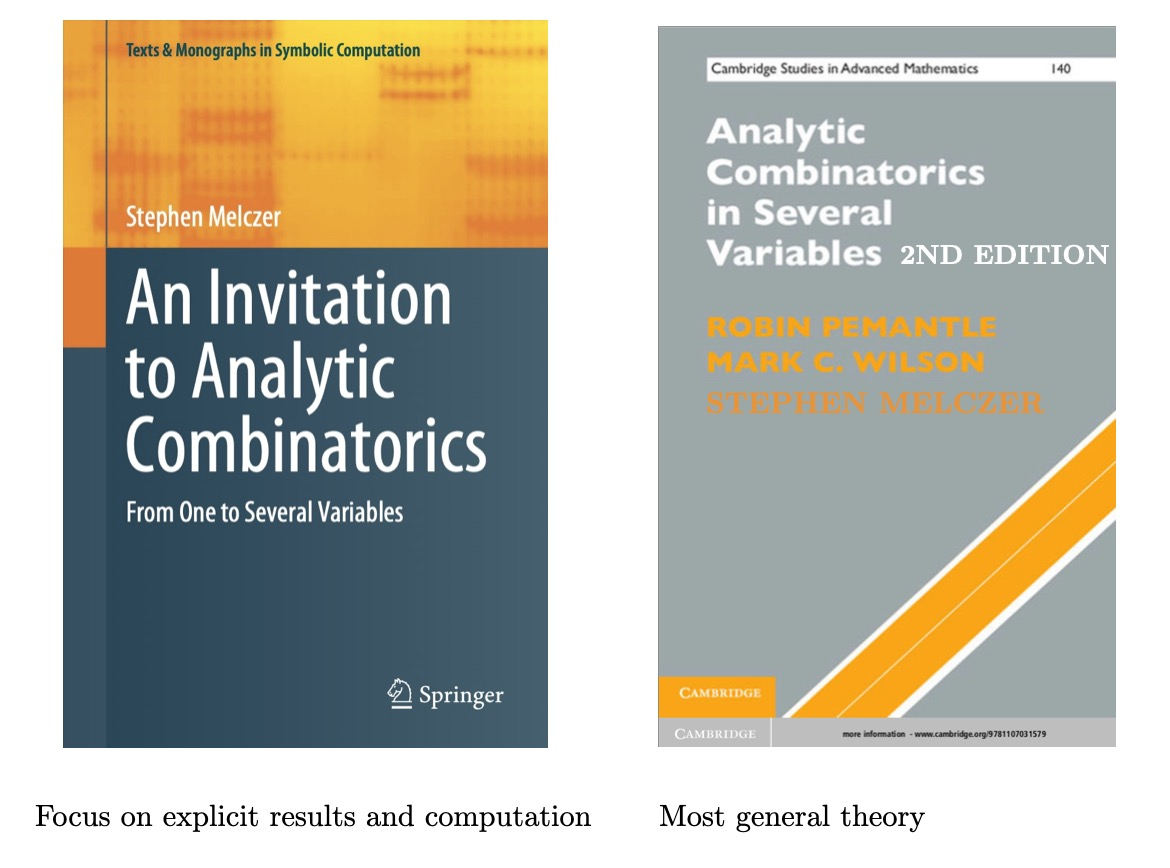

# Thank you!

# [**melczer.ca/BIRS22**](https://melczer.ca/BIRS22)